In [88]:
import matplotlib.pyplot as plt
import numpy as np
import dill as pickle

In [91]:
jr_file = "job_0_output.pickle"
with open(jr_file, mode="rb") as f:
    jr = pickle.load(f)

In [111]:
def plot_minimum_objective(jr):
    _, dataY = jr.test_repository.get(jr.test_suite)
    dataY = np.asarray(dataY)
    component_minima = [[] for i in range(dataY.shape[1])]
    total_minima = []
    for output in dataY:
        for i in range(len(output)):
            if len(component_minima[i]) == 0 or output[i] < component_minima[i][-1]:
                component_minima[i].append(output[i])
            else:
                component_minima[i].append(component_minima[i][-1])
                
        min_obj = np.min(output)
        if len(total_minima) == 0 or min_obj < total_minima[-1]:
            total_minima.append(min_obj)
        else:
            total_minima.append(total_minima[-1])
    
    fig, axs = plt.subplots(1, len(output) + 1, sharex=True, sharey=True, figsize=(10*len(output), 10))
    for i in range(len(output)):
        axs[i].plot(component_minima[i])
        axs[i].set_title("Component {} minimum".format(i+1))
    axs[-1].plot(total_minima)
    axs[-1].set_title("Overall minimum")

In [107]:
def plot_model_losses(jr, model):
    perf = jr.model_performance[model]
    data_D = perf.get_history("discriminator_loss")
    data_G = perf.get_history("generator_loss")
    rows = len(data_D)
    
    fig, axs = plt.subplots(rows, 2, sharex=True, figsize=(10, 10*rows))
    for r in range(rows):
        idx = (r,0) if rows > 1 else 0
        axs[idx].plot(data_D[r])
        axs[idx].set_title("Model reset {} discriminator l.".format(r))
        idx = (r,1) if rows > 1 else 1
        axs[idx].plot(data_G[r])
        axs[idx].set_title("Model reset {} generator l.".format(r))
        
    

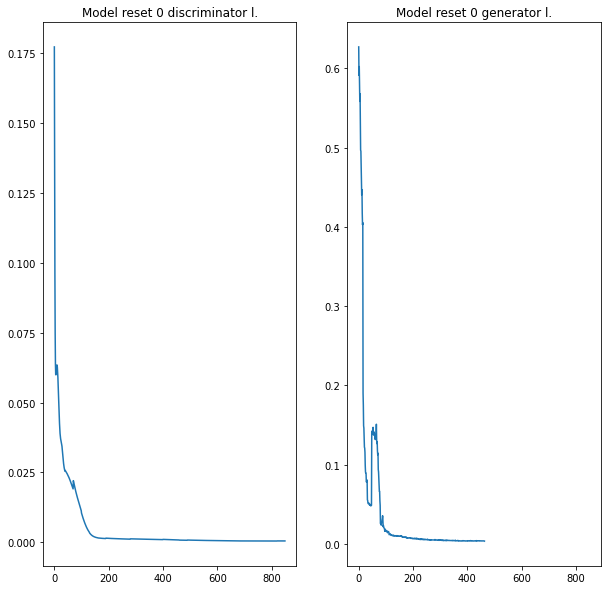

In [77]:
plot_model_losses(jr, 2)

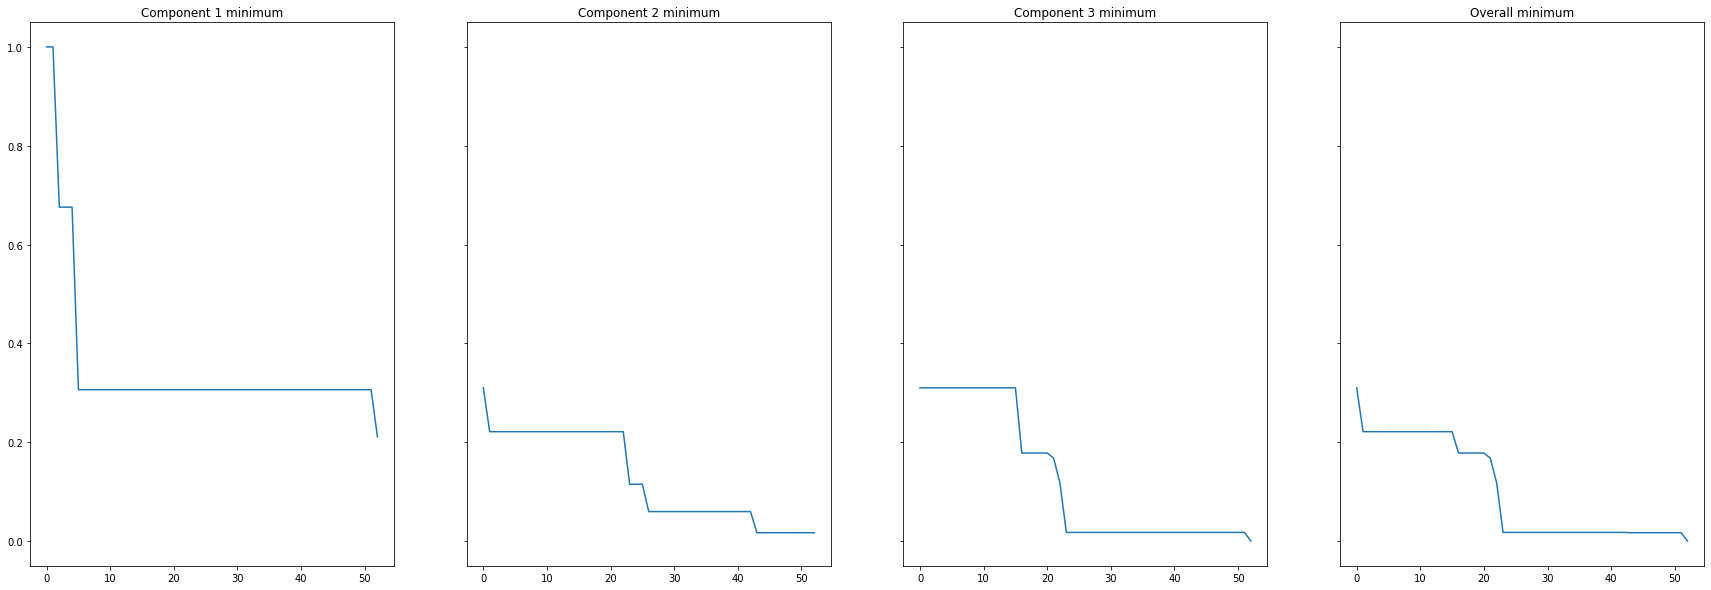

In [112]:
plot_minimum_objective(jr)